In [12]:
T_list = []

In [23]:
from Plot import *
from Grid import *
from Potential import *
import json
from scipy.integrate import trapz
from matplotlib import animation



x,t = CreateGrid()

Nt = len(t)
t_frac = 0.99
Nt_anal = int(t_frac*Nt)

PSI = np.load("psi_files/PSI.npy")
print(PSI.shape)
PSI_dens = np.abs(PSI)**2




x_less = x[x<0]
x_more = x[x>0]

dens_less = PSI_dens[:,Nt-1][x<0]
dens_more = PSI_dens[:,Nt-1][x>0]

T_list.append(trapz(x_more,dens_more))



(2500, 3000)


[0.46613659 0.54288183 0.47131676 0.54592308 0.47032464 0.54936681]


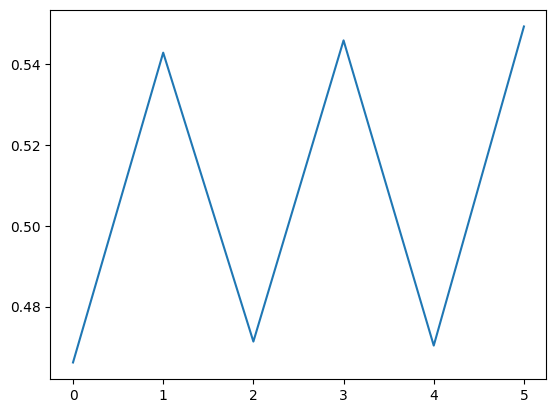

In [25]:
T = np.abs(np.array(T_list))
print(T)

plt.plot(T)

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-10,10), ylim=(-0.3, 0.3))
line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    global x
    y = PSI_dens[:,i-1]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2999, interval=100, blit=True)

#y = np.max(PSI_dens[:,Nt-1])*np.exp(-0.15*x**2)
#plt.plot(x,y,label = "Exact")
plt.plot(x,CreateV(x)[1],label = "Potential", color = "k")

plt.title("Gaussian Wavepacket")
plt.legend()
plt.show()

anim.save('./images/PartiallyReflected.mp4', fps=60,dpi =250)

In [2]:
import numpy as np 
test = np.array([1,2,3,4,5])
test[:2] = test[:2] +1
print(test)

[2 3 3 4 5]
